In [98]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

In [91]:
def Gabor(sigma, theta, f, psi, gamma):
    sigma_x = sigma
    sigma_y = sigma / gamma

    # Bounding box
    nstds = 3 # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation 
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * (np.cos(2 * np.pi * f * x_theta + psi) + 1j*np.sin(2 * np.pi * f * x_theta + psi))
    
    return gb
    

In [96]:
theta = np.pi/4
f = 0.1
gamma = 1
psi = 0
c =0.25
sigma = c/f

gb = Gabor(sigma, theta, f, psi, gamma) 

G0 = np.real(gb)
H0 = np.imag(gb)

G0F = np.fft.fftshift(np.fft.fft2(G0))
ampG0 = np.absolute(G0F)

H0F = np.fft.fft2(H0)
ampH0 = np.fft.fftshift(np.absolute(H0F))

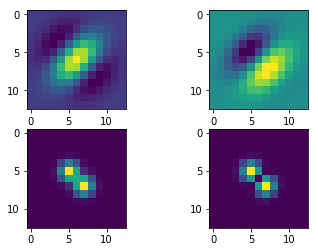

In [97]:
fig, axs = plt.subplots(2,2)



axs[0][0].imshow(G0)
axs[0][1].imshow(H0)

axs[1][0].imshow(ampG0)
axs[1][1].imshow(ampH0)

[ 0.03671089  0.07021566  0.11369652  0.16727668  0.23054433  0.30252315
  0.38167723  0.46595223  0.55285177  0.63954555  0.7230036   0.8001486
  0.86801716  0.92391969  0.96558877  0.99130614  1.          0.99130614
  0.96558877  0.92391969  0.86801716  0.8001486   0.7230036   0.63954555
  0.55285177  0.46595223  0.38167723  0.30252315  0.23054433  0.16727668
  0.11369652  0.07021566  0.03671089]


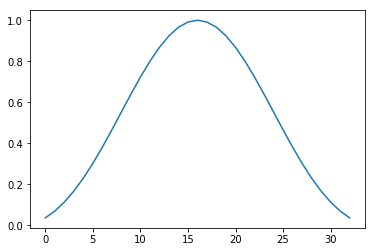

In [116]:
ki = np.kaiser(33, 5)
ki = np.array(ki)
print(ki)

plt.plot(ki)